**Bagian 1: Panel Data**

(Data yang disajikan berikut adalah data tingkat negara yang sudah diolah dari **World Development Indicators** Bank Dunia). Anda diberikan data investasi asing dan pertumbuhan ekonomi tahunan tujuh negara di Asia dari tahun 1990 sampai 2019 yaitu Tiongkok, India, Vietnam, Malaysia, Indonesia, Filipina, Thailand, dan Korea Selatan. Anda diminta untuk melakukan regresi panel untuk melihat hubungan antara tingkat investasi asing dan pertumbuhan ekonomi. *Identifier* negara terdapat di variabel `country`. Investasi asing direpresentasikan oleh variabel `fdi`, yaitu besar arus masuk penanaman modal asing sebagai persentase dari PDB. Pertumbuhan ekonomi direpresentasikan oleh dua variabel, yaitu `gdp` dan `log_gdp`, yaitu tingkat PDB riil berdasarkan *purchasing power parity tahun 2017*. Kedua variabel belum dikonversi dalam bentuk variabel tingkat pertumbuhan. File yang akan diberikan bernama `homework_5_panel.csv`


1. Lakukan inspeksi data secara visual dengan melihat *scatterplot* korelasi antara PDB dan tingkat investasi.

2. Konversi variabel `country` menjadi *dummy variable* dengan nilai berikut: `China = 0`, `South Korea = 1`, `Vietnam = 2`, `Thailand = 3`, `Philippines = 4`, `Malaysia = 5`, `Indonesia = 6`, `India = 7`})

3. Untuk melihat efek dari investasi asing terhadap pertumbuhan ekonomi, maka perlu dilakukan *first differencing* terhadap variabel `log_gdp` untuk memperoleh variabel tingkat pertumbuhan. Selisih antara `log_gdp` merupakan aproksimasi yang sangat mendekati tingkat pertumbuhan PDB. Lakukan *first differencing* terhadap variabel `log_gdp` tersebut yang menghasilkan variabel baru `diff_log_gdp`. Pastikan bahwa *first differencing* hanya terjadi pada observasi dengan *identifier* yang sama. **First differencing dalam konteks ini hanya digunakan untuk menghitung pertumbuhan ekonomi, bukan untuk modifikasi regresi Pooled OLS seperti yang disebutkan di kelas**

4. Selanjutnya, lakukan regresi *pooled OLS* `diff_log_gdp` terhadap `fdi` dengan modul statsmodels. Jangan gunakan modul linearmodels terlebih dahulu

5. Lakukan regresi *least-squares dummy variable* `diff_log_gdp` terhadap `fdi` dengan modul statsmodels. Jangan gunakan modul linearmodels terlebih dahulu.

6. Konversi dataframe dalam bentuk data panel yang dapat diolah modul linearmodels. Lalu, lakukan regresi *fixed effects* dengan modul linarmodels. Apakah hasilnya sama dengan regresi *least-square dummy variable*?

7. Lakukan regresi *random effects* `diff_log_gdp` terhadap `fdi` dengan modul linearmodels.

8. Bandingkan hasil dari regresi *random effects* dan *fixed effects* dengan fungsi `compare` dalam modul linearmodels.

9. Lakukan uji Hausman untuk menentukan model mana yang sebaiknya digunakan. Apa kesimpulan anda?

10. Lakukan pula *two-way fixed effect*. Dalam modul `linearmodels`, anda bisa melakukan ini dengan `TimeEffects` pada model regresi. Apa yang terjadi dengan parameter `fdi`? Jelaskan!



**Bagian 2: Time Series Data**

(Data yang disajikan berikut adalah data tingkat negara yang sudah diolah dari **FRED Economic Data** St. Louis Federal Reserve Bank). Untuk pertanyaan berikut, anda diminta untuk mencari hubungan antara tingkat PDB Indonesia dan jumlah uang M2 yang beredar. Data berfrekuensi kuartil dan berawal dari kuartil 1 tahun 1990 sampai kuartil 4 tahun 2013. Tingkat PDB Indonesia direpresentasikan oleh variabel `gdpindonesia` dan jumlah uang M2 yang beredar direpresentasikan oleh variabel `moneysupply`. File yang akan diberikan bernama `homework_5_timeseries.csv`.


1. Lakukan inspeksi data secara visual dengan melihat *lineplot* PDB dan jumlah uang beredar terhadap waktu. Apakah kedua variabel tersebut stasioner? Lakukan uji Augmented Dickey-Fuller untuk menguji stasionaritas variabel *time-series*.

2. Lakukan transformasi logaritma terhadap variabel PDB dan jumlah uang beredar, lalu lakukan inspeksi data secara visual dengan melihat *lineplot* serupa seperti pertanyaan sebelumnya. Lakukan juga uji Augmented Dickey-Fuller untuk menguji stasionaritas variabel.

3. Lakukan *first differencing* terhadap hasil transformasi logaritma PDB dan jumlah uang beredar, lalu lakukan inspeksi data secara visual dengan melihat *lineplot* serupa seperti pertanyaan sebelumnya. Lakukan juga uji Augmented Dickey-Fuller untuk menguji stasionaritas variabel.

4. Konversi dataframe agar dapat melakukan regresi *vector autoregression*.

5. Lakukan regresi *vector autoregression* dengan *lag* model sesuai Akaike Information Criterion.

6. Lakukan uji Granger Causality untuk menentukan arah kausalitas variabel. Apakah jumlah uang beredar *granger-cause* PDB, atau sebaliknya?

### Jawaban

**Modules & Setup**

In [2]:
# !pip install linearmodels

     |████████████████████████████████| 1.5 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 55 kB 10.3 MB/s eta 0:00:01


In [3]:
from statsmodels.compat import lzip
import numpy.linalg as la
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.api as sms
from linearmodels import PanelOLS
from linearmodels import RandomEffects
from linearmodels.panel import compare
from statsmodels.tsa.base.datetools import dates_from_str
from statsmodels.tsa.api import VAR
from statsmodels.tsa.api import acf, pacf, graphics
from statsmodels.tsa.stattools import adfuller, pacf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_pacf


df = pd.read_csv("")
df2 = pd.read_csv("")

In [5]:
df.head()

,country,year,fdi,gdp,log_gdp
0,China,1990,0.966308,1.616386e+12,28.111214
1,China,1991,1.138838,1.766108e+12,28.199799
2,China,1992,2.613162,2.017329e+12,28.332796
3,China,1993,6.186882,2.297409e+12,28.462803
4,China,1994,5.987156,2.596918e+12,28.585346


In [6]:
df2.head()

,quarter,moneysupply,gdpindonesia
0,1990q1,6.482046e+13,6.044571e+13
1,1990q2,7.076678e+13,6.242970e+13
2,1990q3,7.610668e+13,6.448990e+13
3,1990q4,8.221311e+13,6.613757e+13
4,1991q1,8.173774e+13,7.134019e+13


### Bagian 1: Panel Regression

**1. *Initial scatterplot***

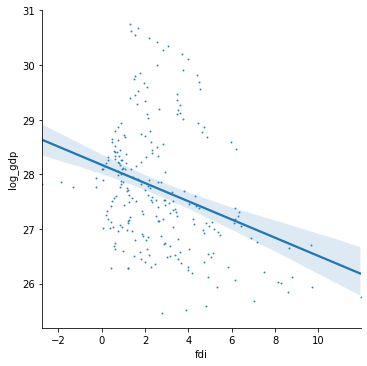

In [8]:
sns.lmplot(x="fdi", y="log_gdp", data=df, scatter_kws={"s": 1.0}, markers="o")

**2. *Converting categorical variable into dummy variable***

Konversi variabel `country` menjadi *dummy variable* dengan nilai berikut: `China = 0`, `South Korea = 1`, `Vietnam = 2`, `Thailand = 3`, `Philippines = 4`, `Malaysia = 5`, `Indonesia = 6`, `India = 7`

In [9]:
# country list
country_list = df['country'].value_counts().sort_values().index
print(country_list)

Index(['Vietnam', 'Malaysia', 'Philippines', 'Thailand', 'South Korea',
       'Indonesia', 'China', 'India'],
      dtype='object')


In [10]:
# country mapping
country_map = {'China': 0, 'South Korea': 1,'Vietnam': 2,'Thailand': 3,
               'Philippines': 4,'Malaysia': 5,'Indonesia': 6,'India': 7}
df['country_code'] = df['country'].map(country_map)
df.head()

,country,year,fdi,gdp,log_gdp,country_code
0,China,1990,0.966308,1.616386e+12,28.111214,0
1,China,1991,1.138838,1.766108e+12,28.199799,0
2,China,1992,2.613162,2.017329e+12,28.332796,0
3,China,1993,6.186882,2.297409e+12,28.462803,0
4,China,1994,5.987156,2.596918e+12,28.585346,0


***3. First differencing log-GDP***

Untuk melihat efek dari investasi asing terhadap pertumbuhan ekonomi, maka perlu dilakukan *first differencing* terhadap variabel `log_gdp` untuk memperoleh variabel tingkat pertumbuhan. Selisih antara `log_gdp` merupakan aproksimasi yang sangat mendekati tingkat pertumbuhan PDB. Lakukan *first differencing* terhadap variabel `log_gdp` tersebut yang menghasilkan variabel baru `diff_log_gdp`. Pastikan bahwa *first differencing* hanya terjadi pada observasi dengan *identifier* yang sama. **First differencing dalam konteks ini hanya digunakan untuk menghitung pertumbuhan ekonomi, bukan untuk modifikasi regresi Pooled OLS seperti yang disebutkan di kelas**

In [11]:
df = df.sort_values(by=['country_code','year'])
df['diff_log_gdp'] = np.where(df.country_code == df.country_code.shift(1), 
                              df['log_gdp'].diff(),
                              float('NaN'))
df.head()

,country,year,fdi,gdp,log_gdp,country_code,diff_log_gdp
0,China,1990,0.966308,1.616386e+12,28.111214,0,NaN
1,China,1991,1.138838,1.766108e+12,28.199799,0,0.088585
2,China,1992,2.613162,2.017329e+12,28.332796,0,0.132997
3,China,1993,6.186882,2.297409e+12,28.462803,0,0.130007
4,China,1994,5.987156,2.596918e+12,28.585346,0,0.122543


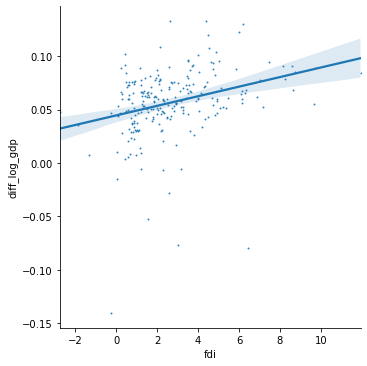

In [14]:
sns.lmplot(x="fdi", y="diff_log_gdp", data=df, scatter_kws={"s": 1.0}, markers="o")

***4. Pooled OLS***

Selanjutnya, lakukan regresi *pooled OLS* `diff_log_gdp` terhadap `fdi` dengan modul statsmodels. Jangan gunakan modul linearmodels terlebih dahulu

In [12]:
mod_pooled = smf.ols(formula='diff_log_gdp ~ fdi', data=df, missing='drop').fit()
print(mod_pooled.summary())

                            OLS Regression Results                            
Dep. Variable:           diff_log_gdp   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     23.48
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           2.33e-06
Time:                        00:14:48   Log-Likelihood:                 481.85
No. Observations:                 232   AIC:                            -959.7
Df Residuals:                     230   BIC:                            -952.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0446      0.003     14.058      0.0

Setiap penambahan 1% foreign direct investment (dari GDP), maka akan menaikkan pertumbuhan ekonomi sebesar 0.45%

***5. LSDV regression***

In [15]:
mod_lsdv = smf.ols(formula='diff_log_gdp ~ fdi + C(country_code)', data=df, missing='drop').fit()
print(mod_lsdv.summary())

                            OLS Regression Results                            
Dep. Variable:           diff_log_gdp   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     10.64
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           1.21e-12
Time:                        00:24:53   Log-Likelihood:                 508.08
No. Observations:                 232   AIC:                            -998.2
Df Residuals:                     223   BIC:                            -967.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0733 

Setiap penambahan 1% foreign direct investment (dari GDP), maka akan menaikkan pertumbuhan ekonomi sebesar 0.51%

***6. Fixed effects regression with linearmodels module***

In [18]:
# within group
pooled_df = df.set_index(['country_code','year'])
mod_fixed = PanelOLS.from_formula('diff_log_gdp ~ fdi + EntityEffects', data=pooled_df)
print(mod_fixed.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:           diff_log_gdp   R-squared:                        0.0619
Estimator:                   PanelOLS   R-squared (Between):              0.4047
No. Observations:                 232   R-squared (Within):               0.0619
Date:                Thu, Jan 27 2022   R-squared (Overall):              0.3411
Time:                        00:30:22   Log-likelihood                    508.08
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      14.721
Entities:                           8   P-value                           0.0002
Avg Obs:                       29.000   Distribution:                   F(1,223)
Min Obs:                       29.000                                           
Max Obs:                       29.000   F-statistic (robust):             14.721
                            

***7. Random effects regression with linearmodels module***

Lakukan regresi random effects diff_log_gdp terhadap fdi dengan modul linearmodels.

In [20]:
mod_random = RandomEffects.from_formula('diff_log_gdp ~ fdi', data=pooled_df)
print(mod_random.fit())

                        RandomEffects Estimation Summary                        
Dep. Variable:           diff_log_gdp   R-squared:                        0.1071
Estimator:              RandomEffects   R-squared (Between):              0.4976
No. Observations:                 232   R-squared (Within):               0.0563
Date:                Thu, Jan 27 2022   R-squared (Overall):              0.4157
Time:                        00:35:22   Log-likelihood                    499.61
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      27.717
Entities:                           8   P-value                           0.0000
Avg Obs:                       29.000   Distribution:                   F(1,231)
Min Obs:                       29.000                                           
Max Obs:                       29.000   F-statistic (robust):             27.717
                            

***8. Model comparison***

Bandingkan hasil dari regresi *random effects* dan *fixed effects* dengan fungsi `compare` dalam modul linearmodels.

In [31]:
print(compare({'FE': mod_fixed.fit(), 'RE': mod_random.fit()}))

                     Model Comparison                     
                                      FE                RE
----------------------------------------------------------
Dep. Variable               diff_log_gdp      diff_log_gdp
Estimator                       PanelOLS     RandomEffects
No. Observations                     232               232
Cov. Est.                     Unadjusted        Unadjusted
R-squared                         0.0619            0.1071
R-Squared (Within)                0.0619            0.0563
R-Squared (Between)               0.4047            0.4976
R-Squared (Overall)               0.3411            0.4157
F-statistic                       14.721            27.717
P-value (F-stat)                  0.0002            0.0000
=====================     ==============   ===============
fdi                               0.0051            0.0066
                                (3.8368)          (5.2646)
======================= ================ ===============

***9. Hausman test***

Lakukan uji Hausman untuk menentukan model mana yang sebaiknya digunakan. Apa kesimpulan anda?

*"...By running the Hausman-Test, the null hypothesis is that the covariance between IV(s) and alpha is zero. If this is the case, then RE is preferred over FE. If the null hypothesis is not true, we must go with the FE-model.*

In [33]:
def hausman(fe, re):
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov
    df = b[np.abs(b) < 1e8].size
    chi2 = np.dot((b - B).T, la.inv(v_b - v_B).dot(b - B)) 
 
    pval = stats.chi2.sf(chi2, df)
    
    return chi2, df, pval

In [34]:
hausman_results = hausman(mod_fixed.fit(), mod_random.fit()) 
print('chi-Squared: ' + str(hausman_results[0]))
print('degrees of freedom: ' + str(hausman_results[1]))
print('p-Value: ' + str(hausman_results[2]))

chi-Squared: 13.164598386935127
degrees of freedom: 1
p-Value: 0.0002852879253946507


p-Value 0.00028 < 0.05 ; maka kita reject null hypothesis dan berkesimpulan Fixed Effect model lebih cocok.

***10. Two-Way Fixed Effect***

Lakukan pula *two-way fixed effect*. Dalam modul `linearmodels`, anda bisa melakukan ini dengan `TimeEffects` pada model regresi. Apa yang terjadi dengan parameter `fdi`? Jelaskan!

In [36]:
mod_fixed_tse = PanelOLS.from_formula('diff_log_gdp ~ fdi + EntityEffects + TimeEffects', data=pooled_df)
print(mod_fixed_tse.fit())

                          PanelOLS Estimation Summary                           
Dep. Variable:           diff_log_gdp   R-squared:                        0.0873
Estimator:                   PanelOLS   R-squared (Between):              0.3888
No. Observations:                 232   R-squared (Within):               0.0618
Date:                Thu, Jan 27 2022   R-squared (Overall):              0.3281
Time:                        01:28:36   Log-likelihood                    577.99
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      18.662
Entities:                           8   P-value                           0.0000
Avg Obs:                       29.000   Distribution:                   F(1,195)
Min Obs:                       29.000                                           
Max Obs:                       29.000   F-statistic (robust):             18.662
                            

parameter `fdi` turun dari `0.0051` ke `0.0048` (tidak terlalu banyak beda) tapi masih dalam range confidence interval, dikarenakan efek dari (most of) titik waktu yang tidak signifikan.

contoh tahun-tahun yang signifikan hanya ini:
- 1994
- 1995
- 1998
- 2009

In [37]:
mod_lsdv_tse = smf.ols(formula='diff_log_gdp ~ fdi + C(country_code) + C(year)', data=df, missing='drop').fit()
print(mod_lsdv_tse.summary())

                            OLS Regression Results                            
Dep. Variable:           diff_log_gdp   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     8.257
Date:                Thu, 27 Jan 2022   Prob (F-statistic):           1.05e-23
Time:                        01:37:57   Log-Likelihood:                 577.99
No. Observations:                 232   AIC:                            -1082.
Df Residuals:                     195   BIC:                            -954.4
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.0717 

### Bagian 2: Time Series Data

**1. *Visualization and stationarity test of initial variables***

Lakukan inspeksi data secara visual dengan melihat *lineplot* PDB dan jumlah uang beredar terhadap waktu. Apakah kedua variabel tersebut stasioner? Lakukan uji Augmented Dickey-Fuller untuk menguji stasionaritas variabel *time-series*.

In [43]:
df3 = df2.set_index('quarter')
df3.head()

,moneysupply,gdpindonesia
quarter,,
1990q1,6.482046e+13,6.044571e+13
1990q2,7.076678e+13,6.242970e+13
1990q3,7.610668e+13,6.448990e+13
1990q4,8.221311e+13,6.613757e+13
1991q1,8.173774e+13,7.134019e+13


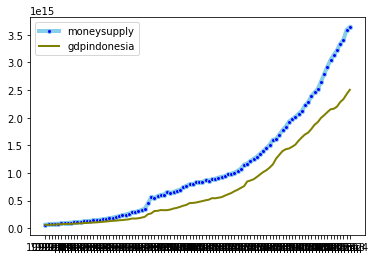

In [46]:
plt.plot('moneysupply', data=df3, marker='o', markerfacecolor='blue', markersize=4, color='skyblue', linewidth=4)
plt.plot('gdpindonesia', data=df3, marker='', color='olive', linewidth=2)
plt.legend()
plt.show()

In [47]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    print('1. ADF : ', dftest[0])
    print('2. P-Value : ', dftest[1])
    print('3. Num of Lags : ', dftest[2])
    print('4. Num of Observation used for ADF Regression & Critical Values Calc. : ', dftest[3])
    print('5. Critical Values : ')
    for key, val in dftest[4].items():
        print('\t', key, ': ', val)

In [51]:
# MONEY SUPPLY ADTEST
ad_test(df3['moneysupply'])

1. ADF :  2.884560556030318
2. P-Value :  1.0
3. Num of Lags :  5
4. Num of Observation used for ADF Regression & Critical Values Calc. :  90
5. Critical Values : 
	 1% :  -3.505190196159122
	 5% :  -2.894232085048011
	 10% :  -2.5842101234567902


In [52]:
# GDP ADTEST
ad_test(df3['gdpindonesia'])

1. ADF :  4.384629277411707
2. P-Value :  1.0
3. Num of Lags :  2
4. Num of Observation used for ADF Regression & Critical Values Calc. :  93
5. Critical Values : 
	 1% :  -3.502704609582561
	 5% :  -2.8931578098779522
	 10% :  -2.583636712914788


Money supply dan GDP adalah non-stationary process

**2. *Visualization and stationarity test of log-transformed variables***

Lakukan transformasi logaritma terhadap variabel PDB dan jumlah uang beredar, lalu lakukan inspeksi data secara visual dengan melihat *lineplot* serupa seperti pertanyaan sebelumnya. Lakukan juga uji Augmented Dickey-Fuller untuk menguji stasionaritas variabel.

In [53]:
df2['log_gdpindonesia'] = np.log(df2['gdpindonesia'])
df2.head()

,quarter,moneysupply,gdpindonesia,log_gdpindonesia
0,1990q1,6.482046e+13,6.044571e+13,31.732767
1,1990q2,7.076678e+13,6.242970e+13,31.765062
2,1990q3,7.610668e+13,6.448990e+13,31.797530
3,1990q4,8.221311e+13,6.613757e+13,31.822758
4,1991q1,8.173774e+13,7.134019e+13,31.898481


In [54]:
df2['log_moneysupply'] = np.log(df2['moneysupply'])
df2.head()

,quarter,moneysupply,gdpindonesia,log_gdpindonesia,log_moneysupply
0,1990q1,6.482046e+13,6.044571e+13,31.732767,31.802642
1,1990q2,7.076678e+13,6.242970e+13,31.765062,31.890411
2,1990q3,7.610668e+13,6.448990e+13,31.797530,31.963157
3,1990q4,8.221311e+13,6.613757e+13,31.822758,32.040336
4,1991q1,8.173774e+13,7.134019e+13,31.898481,32.034537


In [56]:
df2 = df2.set_index('quarter')

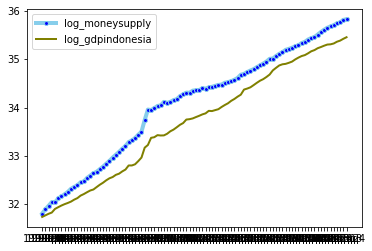

In [57]:
plt.plot('log_moneysupply', data=df2, marker='o', markerfacecolor='blue', markersize=4, color='skyblue', linewidth=4)
plt.plot('log_gdpindonesia', data=df2, marker='', color='olive', linewidth=2)
plt.legend()
plt.show()

In [58]:
# LOG MONEY SUPPLY ADTEST
ad_test(df2['log_moneysupply'])

1. ADF :  -1.5207440580978535
2. P-Value :  0.5232257349197708
3. Num of Lags :  5
4. Num of Observation used for ADF Regression & Critical Values Calc. :  90
5. Critical Values : 
	 1% :  -3.505190196159122
	 5% :  -2.894232085048011
	 10% :  -2.5842101234567902


In [59]:
# LOG GDP ADTEST
ad_test(df2['log_gdpindonesia'])

1. ADF :  -1.0752224255898029
2. P-Value :  0.7248511085792668
3. Num of Lags :  4
4. Num of Observation used for ADF Regression & Critical Values Calc. :  91
5. Critical Values : 
	 1% :  -3.50434289821397
	 5% :  -2.8938659630479413
	 10% :  -2.5840147047458037


**3. *Visualization and stationarity test of first-differenced variables***

Lakukan *first differencing* terhadap hasil transformasi logaritma PDB dan jumlah uang beredar, lalu lakukan inspeksi data secara visual dengan melihat *lineplot* serupa seperti pertanyaan sebelumnya. Lakukan juga uji Augmented Dickey-Fuller untuk menguji stasionaritas variabel.

In [61]:
df2['diff_log_gdpindonesia'] = df2['log_gdpindonesia'].diff()
df2['diff_log_moneysupply'] = df2['log_moneysupply'].diff()

df2.head()

,moneysupply,gdpindonesia,log_gdpindonesia,log_moneysupply,diff_log_gdpindonesia,diff_log_moneysupply
quarter,,,,,,
1990q1,6.482046e+13,6.044571e+13,31.732767,31.802642,NaN,NaN
1990q2,7.076678e+13,6.242970e+13,31.765062,31.890411,0.032295,0.087768
1990q3,7.610668e+13,6.448990e+13,31.797530,31.963157,0.032468,0.072746
1990q4,8.221311e+13,6.613757e+13,31.822758,32.040336,0.025228,0.077179
1991q1,8.173774e+13,7.134019e+13,31.898481,32.034537,0.075723,-0.005799


<AxesSubplot:xlabel='quarter', ylabel='diff_log_gdpindonesia'>

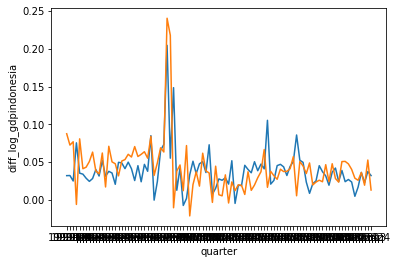

In [62]:
df2 = df2.dropna()

sns.lineplot(data=df2, x='quarter', y='diff_log_gdpindonesia')
sns.lineplot(data=df2, x='quarter', y='diff_log_moneysupply')

In [63]:
# DIFF LOG GDP ADTEST
ad_test(df2['diff_log_gdpindonesia'])

1. ADF :  -5.265601336179025
2. P-Value :  6.4493363506077895e-06
3. Num of Lags :  3
4. Num of Observation used for ADF Regression & Critical Values Calc. :  91
5. Critical Values : 
	 1% :  -3.50434289821397
	 5% :  -2.8938659630479413
	 10% :  -2.5840147047458037


In [64]:
# DIFF LOG MS ADTEST
ad_test(df2['diff_log_moneysupply'])

1. ADF :  -2.891709682287449
2. P-Value :  0.046320576931601666
3. Num of Lags :  4
4. Num of Observation used for ADF Regression & Critical Values Calc. :  90
5. Critical Values : 
	 1% :  -3.505190196159122
	 5% :  -2.894232085048011
	 10% :  -2.5842101234567902


Setelah dilakukan 1st diff, kedua variabel menjadi stationary.

***4. Dataframe conversion***

In [74]:
# df2.reset_index(level=0, inplace=True)
# df2.head()

In [70]:
df2 = df2.drop('level_0', 1)
df2 = df2.drop('index', 1)

In [72]:
quarterly = df2['quarter'].astype(str)
quarterly = dates_from_str(quarterly)

df2.index = pd.DatetimeIndex(quarterly)
df2.head()

,quarter,moneysupply,gdpindonesia,log_gdpindonesia,log_moneysupply,diff_log_gdpindonesia,diff_log_moneysupply
1990-06-30,1990q2,7.076678e+13,6.242970e+13,31.765062,31.890411,0.032295,0.087768
1990-09-30,1990q3,7.610668e+13,6.448990e+13,31.797530,31.963157,0.032468,0.072746
1990-12-31,1990q4,8.221311e+13,6.613757e+13,31.822758,32.040336,0.025228,0.077179
1991-03-31,1991q1,8.173774e+13,7.134019e+13,31.898481,32.034537,0.075723,-0.005799
1991-06-30,1991q2,8.863533e+13,7.392333e+13,31.934050,32.115552,0.035569,0.081015


In [76]:
df2 = df2[['log_gdpindonesia','log_moneysupply']]
df2.head()

,log_gdpindonesia,log_moneysupply
1990-06-30,31.765062,31.890411
1990-09-30,31.797530,31.963157
1990-12-31,31.822758,32.040336
1991-03-31,31.898481,32.034537
1991-06-30,31.934050,32.115552


In [77]:
df2 = np.log(df2).diff().dropna()
df2.head()

,log_gdpindonesia,log_moneysupply
1990-09-30,0.001022,0.002279
1990-12-31,0.000793,0.002412
1991-03-31,0.002377,-0.000181
1991-06-30,0.001114,0.002526
1991-09-30,0.001074,0.001290


***5. VAR regression***

In [78]:
var_model = VAR(df2)

/Applications/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  warnings.warn('No frequency information was'


In [79]:
res_var_model = var_model.fit(maxlags=12, ic='aic')
print(res_var_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 27, Jan, 2022
Time:                     09:17:12
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -27.5475
Nobs:                     87.0000    HQIC:                  -28.0554
Log likelihood:           1018.41    FPE:                4.67730e-13
AIC:                     -28.3978    Det(Omega_mle):     3.40278e-13
--------------------------------------------------------------------
Results for equation log_gdpindonesia
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                       0.000758         0.000262            2.900           0.004
L1.log_gdpindonesia         0.091344         0.128514            0.711           0.477
L1.log_moneysupply       

***6. Granger Causality Tests***

Lakukan uji Granger Causality untuk menentukan arah kausalitas variabel. Apakah jumlah uang beredar *granger-cause* PDB, atau sebaliknya?

In [81]:
a = res_var_model.test_causality('log_gdpindonesia', 'log_moneysupply')
print(a)

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: log_moneysupply does not Granger-cause log_gdpindonesia: fail to reject at 5% significance level. Test statistic: 1.696, critical value: 2.074>, p-value: 0.114>


In [82]:
b = res_var_model.test_causality('log_moneysupply', 'log_gdpindonesia')
print(b)

<statsmodels.tsa.vector_ar.hypothesis_test_results.CausalityTestResults object. H_0: log_gdpindonesia does not Granger-cause log_moneysupply: reject at 5% significance level. Test statistic: 4.111, critical value: 2.074>, p-value: 0.000>


- test granger a, p-value nya tidak signifikan.
- test granger b, p-value nya signifikan ; GDP growth di Indonesia mempengaruhi Money demand.

**aktifitas ekonomi masyarakat lah yang menyebabkan peningkatan uang beredar, dan bukan sebaliknya.**